## NETFLIX RECOMMENDATION

In [107]:
#############################################################################################################

#  Packages installed : Pandas and Matplotlib
# # sc.list_packages()
sc.install_pypi_package("pandas==1.0.3") #Install pandas version 0.25.1 
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [108]:
# Importing the required packages for Pyspark
import pyspark.sql.functions as F
from pyspark.sql.functions import *
from pyspark.sql.window import Window
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [109]:
# Reading the Data Sources
Movies_DF = spark.read.option('delimiter',",").csv("s3://aws-emr-resources-947946919000-us-east-1/data files/movie_titles.txt")
Training_DF = spark.read.option('delimiter',",").csv("s3://aws-emr-resources-947946919000-us-east-1/data files/TrainingRatings.txt") 
Testing_DF = spark.read.option('delimiter',",").csv("s3://aws-emr-resources-947946919000-us-east-1/data files/TestingRatings.txt")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Data Understanding

In [110]:
# Renaming the column names of the dataframe for analysis
Movies_DF = Movies_DF.withColumnRenamed('_c0','MovieID').withColumnRenamed('_c1','YOR').withColumnRenamed('_c2','Movie_Desc')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [111]:
Movies_DF.groupBy('YOR').agg({'Movie_Desc':'Count'}).orderBy('YOR',ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----------------+
| YOR|count(Movie_Desc)|
+----+-----------------+
|NULL|                7|
|2005|              512|
|2004|             1436|
|2003|             1271|
|2002|             1310|
|2001|             1184|
|2000|             1234|
|1999|              965|
|1998|              743|
|1997|              653|
|1996|              533|
|1995|              490|
|1994|              459|
|1993|              376|
|1992|              342|
|1991|              316|
|1990|              296|
|1989|              276|
|1988|              283|
|1987|              267|
+----+-----------------+
only showing top 20 rows

In [112]:
# Checking the level of data
(Movies_DF.groupBy('MovieID').agg(F.countDistinct("Movie_Desc").alias("Count")).filter(F.col('Count')>1).show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----+
|MovieID|Count|
+-------+-----+
+-------+-----+

In [113]:
Training_DF.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-------+---+
|_c0|    _c1|_c2|
+---+-------+---+
|  8|1744889|1.0|
|  8|1395430|2.0|
|  8|1205593|4.0|
|  8|1488844|4.0|
|  8|1447354|1.0|
|  8| 306466|4.0|
|  8|1331154|4.0|
|  8|1818178|3.0|
|  8| 991725|4.0|
|  8|1987434|4.0|
+---+-------+---+
only showing top 10 rows

In [114]:
# Renaming the column names of the dataframe for analysis
Training_DF = Training_DF.withColumnRenamed('_c0','MovieID').withColumnRenamed('_c1','UserID').withColumnRenamed('_c2','Rating')
Testing_DF = Testing_DF.withColumnRenamed('_c0','MovieID').withColumnRenamed('_c1','UserID').withColumnRenamed('_c2','Rating')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [115]:
# Checking the level of data for Training Data - if the user has rated a movie more than one time -- NO
(Training_DF.groupBy('MovieID','UserID').agg(F.countDistinct("Rating").alias("Count")).filter(F.col('Count')>1).show())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------+-----+
|MovieID|UserID|Count|
+-------+------+-----+
+-------+------+-----+

In [116]:
# Joining the Training dataset and the movies description dataset together
Rating_Test = Training_DF.join(Movies_DF,["MovieID"],'left')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [117]:
Rating_Test.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------+------+----+--------------------+
|MovieID| UserID|Rating| YOR|          Movie_Desc|
+-------+-------+------+----+--------------------+
|      8|1744889|   1.0|2004|What the #$*! Do ...|
|      8|1395430|   2.0|2004|What the #$*! Do ...|
|      8|1205593|   4.0|2004|What the #$*! Do ...|
|      8|1488844|   4.0|2004|What the #$*! Do ...|
|      8|1447354|   1.0|2004|What the #$*! Do ...|
|      8| 306466|   4.0|2004|What the #$*! Do ...|
|      8|1331154|   4.0|2004|What the #$*! Do ...|
|      8|1818178|   3.0|2004|What the #$*! Do ...|
|      8| 991725|   4.0|2004|What the #$*! Do ...|
|      8|1987434|   4.0|2004|What the #$*! Do ...|
|      8|1765381|   4.0|2004|What the #$*! Do ...|
|      8| 433803|   3.0|2004|What the #$*! Do ...|
|      8|1148143|   2.0|2004|What the #$*! Do ...|
|      8|1174811|   5.0|2004|What the #$*! Do ...|
|      8|1684516|   3.0|2004|What the #$*! Do ...|
|      8| 754781|   4.0|2004|What the #$*! Do ...|
|      8| 567025|   4.0|2004|Wh

In [118]:
# Checking the list of top five rated movies over last three years
Latest_Year = Rating_Test.withColumn("YOR", Rating_Test["YOR"].cast("integer")).agg({"YOR":"max"}).collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [119]:
Latest_Year

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2005

In [120]:
# Checking the Number of Distinct Users who are rating movies on Netflix Each Year
Rating_Test.groupBy("YOR").agg(F.countDistinct("UserID").alias("# of Users")).orderBy("YOR",ascending = False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+----------+
| YOR|# of Users|
+----+----------+
|2005|     20736|
|2004|     28464|
|2003|     28893|
|2002|     28809|
|2001|     28422|
|2000|     28425|
|1999|     28767|
|1998|     28733|
|1997|     28767|
|1996|     28418|
|1995|     28698|
|1994|     24676|
|1993|     26891|
|1992|     27266|
|1991|     28622|
|1990|     27896|
|1989|     27488|
|1988|     28474|
|1987|     28707|
|1986|     28180|
+----+----------+
only showing top 20 rows

In [121]:
# Each Year, Movie average Rating extraction
Rating_Composition = Rating_Test.groupBy("YOR","MovieID").agg({"Rating":"Average"})\
                                .withColumnRenamed("avg(Rating)","Rating(Avg)")\
                                .withColumn("Rating(Avg)",F.round(F.col("Rating(Avg)"),2))\
                                .orderBy("YOR", ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [122]:
# Ranking the Year wise best Rated movies for the LAST Three Years and Top 5 Ranks
RR = Rating_Composition.withColumn("Rank", dense_rank().over(Window.partitionBy("YOR").orderBy(desc("Rating(Avg)")))).filter((F.col("YOR")>Latest_Year-3) & (F.col("Rank")<=5))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [123]:
# Extracting the Movies Description against MovieID's by joining with dataset
TOP_5_LAST_3_YOR = RR.join(Movies_DF,['MovieID'],"left").select(RR["*"],Movies_DF["Movie_Desc"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [124]:
TOP_5_LAST_3_YOR.show(50)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+-----------+----+--------------------+
| YOR|MovieID|Rating(Avg)|Rank|          Movie_Desc|
+----+-------+-----------+----+--------------------+
|2005|   3033|        4.5|   1|Ghost in the Shel...|
|2005|  10757|       3.95|   2|Justice League Un...|
|2005|  17324|       3.84|   3|               Hitch|
|2005|  12952|        3.8|   4|The God Who Wasn'...|
|2005|  16784|       3.78|   5|The Sisterhood of...|
|2004|   7569|       4.38|   1|Dead Like Me: Sea...|
|2004|  10947|       4.34|   2|     The Incredibles|
|2004|   3928|       4.23|   3|  Nip/Tuck: Season 2|
|2004|   7445|        4.2|   4|      Monk: Season 3|
|2004|  11812|       4.15|   5| Million Dollar Baby|
|2003|  14648|       4.35|   1|Finding Nemo (Ful...|
|2003|   5700|       4.18|   2|Law & Order: Seas...|
|2003|    359|       4.08|   3|Absolutely Fabulo...|
|2003|  16022|       4.07|   4|Battlestar Galact...|
|2003|    722|       4.04|   5|  The Wire: Season 1|
+----+-------+-----------+----+---------------

In [125]:
Training_DF.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------+------+
|MovieID| UserID|Rating|
+-------+-------+------+
|      8|1744889|   1.0|
|      8|1395430|   2.0|
|      8|1205593|   4.0|
|      8|1488844|   4.0|
|      8|1447354|   1.0|
|      8| 306466|   4.0|
|      8|1331154|   4.0|
|      8|1818178|   3.0|
|      8| 991725|   4.0|
|      8|1987434|   4.0|
|      8|1765381|   4.0|
|      8| 433803|   3.0|
|      8|1148143|   2.0|
|      8|1174811|   5.0|
|      8|1684516|   3.0|
|      8| 754781|   4.0|
|      8| 567025|   4.0|
|      8|1623132|   4.0|
|      8|1567095|   3.0|
|      8|1666394|   5.0|
+-------+-------+------+
only showing top 20 rows

In [126]:
# Creating New Column for Star Rating
Rating_Composition = Rating_Composition.withColumn("Star Rating",F.when(F.col("Rating(Avg)")>4,F.lit("5 Star Rating")).otherwise(F.when((F.col("Rating(Avg)")<=4) & (F.col("Rating(Avg)")>3),F.lit("4 Star Rating")).otherwise(F.when((F.col("Rating(Avg)")<=3) & (F.col("Rating(Avg)")>2),F.lit("3 Star Rating")).otherwise(F.when((F.col("Rating(Avg)")<=2) & (F.col("Rating(Avg)")>1),F.lit("2 Star Rating")).otherwise(F.lit("1 star Rating"))))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [127]:
# Creating the Pie Chart for the STAR RATING Distribution of Movies
ratings_dist = Rating_Composition.groupBy('Star Rating').count().orderBy('count').toPandas()

plt.clf()
labels = [f"Star Rating: {rating}" for rating in ratings_dist['Star Rating']]
reviews = [num_reviews for num_reviews in ratings_dist['count']]
colors = ['#00876c', '#89c079', '#fff392', '#fc9e5a', '#de425b']
fig, ax = plt.subplots(figsize=(8,5))
w,a,b = ax.pie(reviews, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of star ratings for Movies')
ax.legend(w, labels, title="Star Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

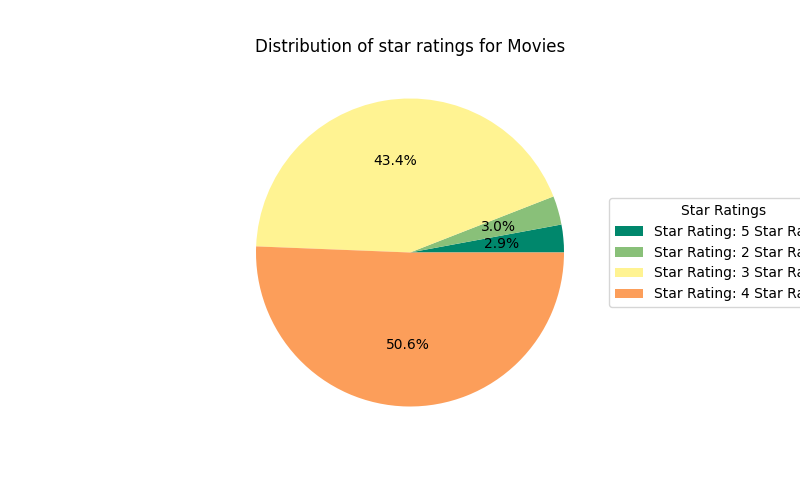

In [128]:
%matplot plt

In [129]:
Training_DF.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------+------+
|MovieID| UserID|Rating|
+-------+-------+------+
|      8|1744889|   1.0|
|      8|1395430|   2.0|
|      8|1205593|   4.0|
|      8|1488844|   4.0|
|      8|1447354|   1.0|
|      8| 306466|   4.0|
|      8|1331154|   4.0|
|      8|1818178|   3.0|
|      8| 991725|   4.0|
|      8|1987434|   4.0|
|      8|1765381|   4.0|
|      8| 433803|   3.0|
|      8|1148143|   2.0|
|      8|1174811|   5.0|
|      8|1684516|   3.0|
|      8| 754781|   4.0|
|      8| 567025|   4.0|
|      8|1623132|   4.0|
|      8|1567095|   3.0|
|      8|1666394|   5.0|
+-------+-------+------+
only showing top 20 rows

In [130]:
# For Choosing the Top list of Users based on the Movie Rating count
# Also filtering for the users whose average rating is greater than 2.5 since that mean they are credible at rating 
User_Rating_DF = Training_DF.groupBy("UserID").agg({"MovieID":"count","Rating":"average"}).orderBy("count(MovieID)",ascending=False).filter(F.col("avg(Rating)")>2.5)

# Filtering for selecting the Users who have rated atleast 500 movies and avg rating given is more than 3
User_Rating_DF = User_Rating_DF.filter((F.col("count(MovieID)")>500) & (F.col("avg(Rating)")>3))

# Extracted list of Top UserId
Users_List = User_Rating_DF.select("UserID").rdd.flatMap(lambda x: x).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [131]:
User_Rating_DF.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------+------------------+
| UserID|count(MovieID)|       avg(Rating)|
+-------+--------------+------------------+
|1664010|          1535|4.2384364820846905|
|2118461|          1481| 4.088453747467927|
|1114324|           876|3.0079908675799087|
|1473980|           680|3.0808823529411766|
| 716173|           675|4.3822222222222225|
|1663888|           669| 3.478325859491779|
| 303948|           621|3.8003220611916264|
|1710658|           591|3.0761421319796955|
|1061195|           572|3.1223776223776225|
|2238060|           570| 4.101754385964912|
|1299887|           565|3.5805309734513275|
| 322009|           562| 3.311387900355872|
|1037245|           542|3.4649446494464944|
|2237185|           524|3.2938931297709924|
| 682963|           520|              3.25|
| 794999|           514| 4.996108949416342|
|1784150|           502| 3.254980079681275|
+-------+--------------+------------------+

In [132]:
# For Choosing the Top list of Movies based on the User Rating count
Movie_Rating_DF = Training_DF.groupBy("MovieID").agg({"UserID":"count","Rating":"average"}).orderBy("count(UserID)",ascending=False).filter(F.col("avg(Rating)")>2.5)

# Filtering only the movies which have atleast 20000 user rating or more and Average Rating greater than 3.5
Movie_Rating_DF = Movie_Rating_DF.filter((F.col("count(UserID)")>20000) & (F.col("avg(Rating)")>3.5))

Movie_Rating_Desc_DF = Movie_Rating_DF.join(Movies_DF,["MovieID"],"left").select(Movie_Rating_DF["*"],Movies_DF["Movie_Desc"])


# Extract movie list 
Movies_list = Movie_Rating_DF.select("MovieID").rdd.flatMap(lambda x: x).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [133]:
Movie_Rating_Desc_DF.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------+------------------+--------------------+
|MovieID|count(UserID)|       avg(Rating)|          Movie_Desc|
+-------+-------------+------------------+--------------------+
|   6971|        25468| 4.071815611748076|Ferris Bueller's ...|
|   6287|        24393|3.7261099495756977|        Pretty Woman|
|   4640|        23525| 4.047438894792774|            Rain Man|
|   9728|        23184|3.8246204278812974|  As Good as It Gets|
|   8596|        23005| 4.103368832862421|               Seven|
|   4432|        22565|3.6721471305118545|     The Italian Job|
|  10947|        21209| 4.339148474704135|     The Incredibles|
|   6408|        21198|3.8013020096235492|        Good Morning|
|   1202|        20997| 3.757298661713578|National Lampoon'...|
|  13651|        20902|3.5951105157401204|       Air Force One|
|  12293|        20691| 4.464598134454594|       The Godfather|
|   8915|        20646|3.9663373050469826|Terminator 2: Ext...|
|   2660|        20153|3.916836203046692

In [134]:
print(Movies_list)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['6971', '6287', '4640', '9728', '8596', '4432', '10947', '6408', '1202', '13651', '12293', '8915', '2660', '1744']

In [135]:
print(Users_List)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['1664010', '2118461', '1114324', '1473980', '716173', '1663888', '303948', '1710658', '1061195', '2238060', '1299887', '322009', '1037245', '2237185', '682963', '794999', '1784150']

## Modeling

In [38]:
# Converting the model to pandas
Training_DF = Training_DF.toPandas()
Testing_DF = Testing_DF.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
# NULL VALUES CHECK
print("Number of NaN values = "+str(Training_DF.isnull().sum()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of NaN values = MovieID    0
UserID     0
Rating     0
dtype: int64

In [33]:
print("Total Data:")
print("Total number of movie ratings = "+str(Training_DF.shape[0]))
print("Number of unique users = "+str(len(np.unique(Training_DF["UserID"]))))
print("Number of unique movies = "+str(len(np.unique(Training_DF["MovieID"]))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Data:
Total number of movie ratings = 3255352
Number of unique users = 28978
Number of unique movies = 1821

In [103]:
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [104]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = Training_DF
ratings.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  MovieID   UserID Rating
0       8  1744889    1.0
1       8  1395430    2.0
2       8  1205593    4.0
3       8  1488844    4.0
4       8  1447354    1.0

In [136]:
data = Dataset.load_from_df(ratings[['MovieID', 'UserID', 'Rating']], reader)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [138]:
# Use the famous SVD algorithm
algo = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'test_rmse': array([0.8486    , 0.84878618, 0.84900361, 0.84991701, 0.84922237]), 'test_mae': array([0.6610716 , 0.66110776, 0.6614615 , 0.66206601, 0.66121566]), 'fit_time': (151.85051584243774, 154.04868960380554, 154.76451110839844, 154.03843235969543, 156.92467069625854), 'test_time': (8.411004781723022, 8.50419569015503, 7.910414457321167, 8.537539720535278, 8.561997652053833)}

In [137]:
print(Testing_DF.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['MovieID', 'UserID', 'Rating']

In [139]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [140]:
# sc.install_pypi_package("surprise") 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [141]:
X = Training_DF[["MovieID","UserID"]]
y = Training_DF[["Rating"]]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [144]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [145]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[3.48319658]
[[-8.24087336e-07  3.92551740e-09]]

In [147]:
y_pred = regressor.predict(X_test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [148]:
df = pd.DataFrame({'Predicted': y_pred.flatten()})
df 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        Predicted
0        3.485821
1        3.478739
2        3.479684
3        3.481406
4        3.478131
...           ...
976601   3.476272
976602   3.491998
976603   3.483330
976604   3.487264
976605   3.489543

[976606 rows x 1 columns]

In [149]:
result = pd.concat([y_test, df], axis=1, sort=False)
result = result.dropna(subset=['Rating'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [150]:
result.head(25)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Rating  Predicted
0     1.0   3.485821
2     4.0   3.479684
4     1.0   3.478131
6     4.0   3.486722
9     4.0   3.471701
11    3.0   3.482970
12    2.0   3.480057
19    5.0   3.487719
24    2.0   3.472996
25    4.0   3.485308
31    2.0   3.493057
33    1.0   3.484532
35    1.0   3.478128
37    3.0   3.483982
40    4.0   3.485549
41    1.0   3.482225
43    2.0   3.482672
44    4.0   3.478408
47    2.0   3.474386
56    3.0   3.487960
60    2.0   3.475444
62    4.0   3.481795
66    3.0   3.482344
77    1.0   3.478356
79    5.0   3.485732